In [42]:
import mlflow
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [57]:
list = mlflow.MlflowClient().search_experiments(filter_string=f"name = 'odr-single-neuron'")
list = list + mlflow.MlflowClient().search_experiments(filter_string=f"name = 'mnm_spatial-single-neuron'")
list = list + mlflow.MlflowClient().search_experiments(filter_string=f"name = 'mnm_feature-single-neuron'")

df = None
for exp in list:
    print(exp.name)
    experiment_id = exp.experiment_id
    runs = mlflow.search_runs(experiment_ids=experiment_id)
    top_level_runs = runs[(runs['tags.mlflow.parentRunId'].notnull()) & (runs['metrics.test_acc'].notna())]
    top_level_runs['experiment'] = exp.name
    # print(top_level_runs.head(1))
    if df is None:
        df = top_level_runs[['experiment', 'tags.mlflow.parentRunId', 'metrics.test_acc']]
    else:
        df = pd.concat([df, top_level_runs[['experiment', 'tags.mlflow.parentRunId', 'metrics.test_acc']]])

df

odr-single-neuron


/var/folders/jv/2ybky5l94gl0__5flr8q9nq40000gn/T/ipykernel_10355/459352970.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_level_runs['experiment'] = exp.name


mnm_spatial-single-neuron


/var/folders/jv/2ybky5l94gl0__5flr8q9nq40000gn/T/ipykernel_10355/459352970.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_level_runs['experiment'] = exp.name


mnm_feature-single-neuron


/var/folders/jv/2ybky5l94gl0__5flr8q9nq40000gn/T/ipykernel_10355/459352970.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_level_runs['experiment'] = exp.name


,experiment,tags.mlflow.parentRunId,metrics.test_acc
0,odr-single-neuron,083e4cf9c5ca4643b4cf70a01d5a45b1,0.2875
1,odr-single-neuron,083e4cf9c5ca4643b4cf70a01d5a45b1,0.3000
2,odr-single-neuron,083e4cf9c5ca4643b4cf70a01d5a45b1,0.3000
3,odr-single-neuron,083e4cf9c5ca4643b4cf70a01d5a45b1,0.2875
4,odr-single-neuron,083e4cf9c5ca4643b4cf70a01d5a45b1,0.3125
...,...,...,...
83,mnm_feature-single-neuron,233df602514b48f28864139a1aa44ee8,0.2000
84,mnm_feature-single-neuron,233df602514b48f28864139a1aa44ee8,0.1500
85,mnm_feature-single-neuron,233df602514b48f28864139a1aa44ee8,0.1875
86,mnm_feature-single-neuron,233df602514b48f28864139a1aa44ee8,0.2000


In [58]:
mean_test_acc = df.groupby(['tags.mlflow.parentRunId', 'experiment']).mean().reset_index()
mean_test_acc

,tags.mlflow.parentRunId,experiment,metrics.test_acc
0,00baaeb6e43941b0ac3a18377bb4ba9c,odr-single-neuron,0.2150
1,01a4ec0e8751425192ecc2b01fabef2c,mnm_spatial-single-neuron,0.2800
2,023e12214243465a8cd455f1c9e8373c,mnm_spatial-single-neuron,0.2725
3,0264d5c3c3df4393b8e9fe041e9133c2,odr-single-neuron,0.2300
4,02a2e4e97bdb4a74a7c07601678059e5,odr-single-neuron,0.1825
...,...,...,...
192,f707d286fd054d40ae4883b1ea7e6d1f,odr-single-neuron,0.3125
193,f7ddd24666df4931b55799c60d157e01,odr-single-neuron,0.3325
194,fad3c5be656447a7803dfe7bddfa3028,odr-single-neuron,0.1575
195,fcd2317ac08a45d886094c54aa17af32,odr-single-neuron,0.2450


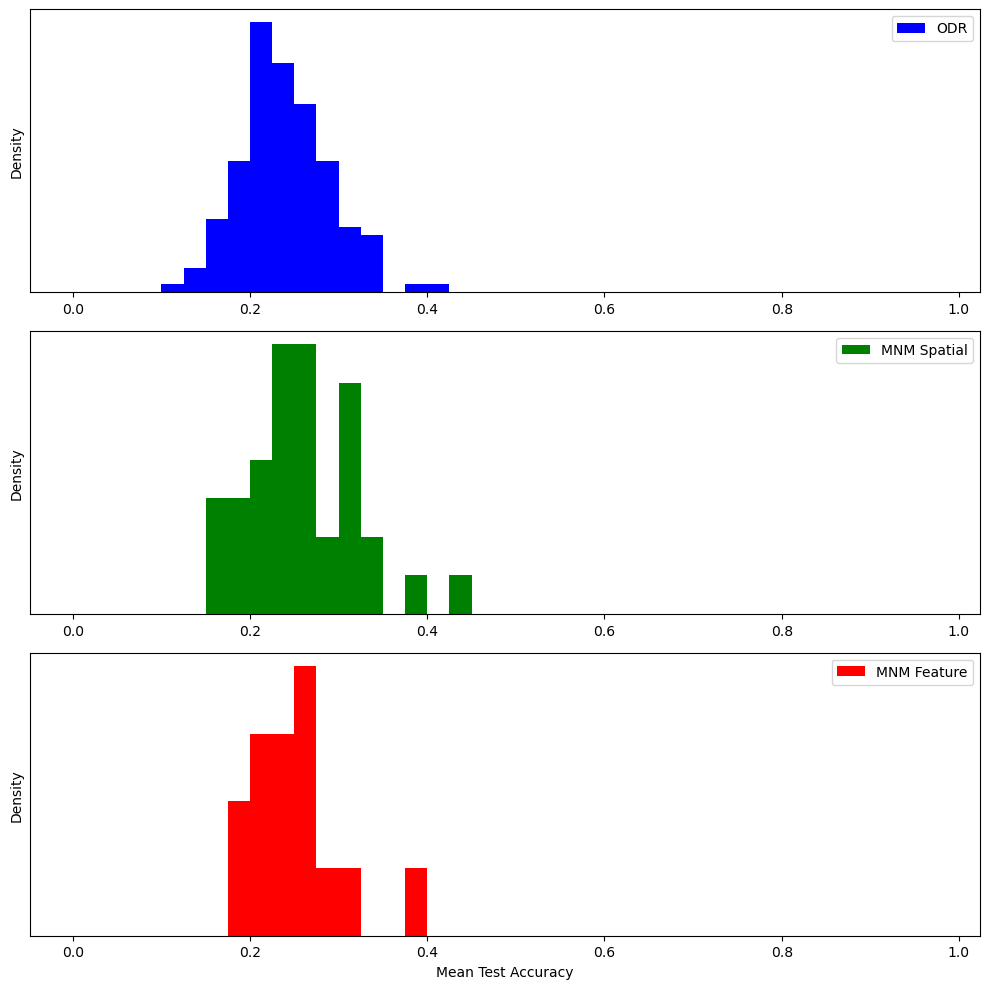

In [66]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Plot for 'odr-single-neuron'
axs[0].hist(mean_test_acc[mean_test_acc['experiment'] == 'odr-single-neuron']['metrics.test_acc'],
            bins=np.arange(0, 1.0, 0.025), label='odr-single-neuron', color='b', density=True)
axs[0].legend(['ODR'])
axs[0].set_ylabel('Density')
axs[0].set_yticks([])

# Plot for 'mnm_spatial-single-neuron'
axs[1].hist(mean_test_acc[mean_test_acc['experiment'] == 'mnm_spatial-single-neuron']['metrics.test_acc'],
            bins=np.arange(0, 1.0, 0.025), label='mnm_spatial-single-neuron', color='g', density=True)
axs[1].legend(['MNM Spatial'])
axs[1].set_ylabel('Density')
axs[1].set_yticks([])

# Plot for 'mnm_feature-single-neuron'
axs[2].hist(mean_test_acc[mean_test_acc['experiment'] == 'mnm_feature-single-neuron']['metrics.test_acc'],
            bins=np.arange(0, 1.0, 0.025), label='mnm_feature-single-neuron', color='r', density=True)
axs[2].legend(['MNM Feature'])
axs[2].set_xlabel('Mean Test Accuracy')
axs[2].set_ylabel('Density')
axs[2].set_yticks([])

plt.tight_layout()
plt.show()